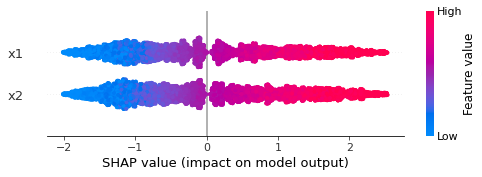

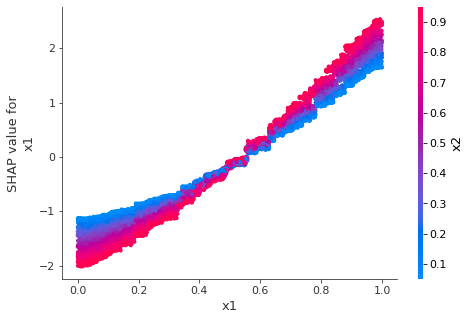

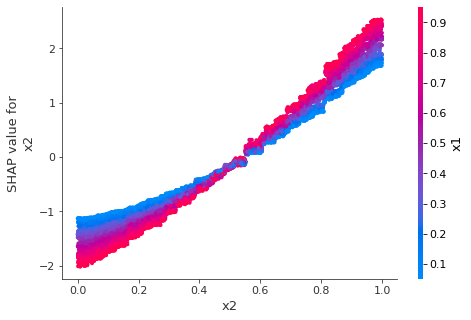

In [1]:

import numpy as np
import pandas as pd
import shap
import xgboost as xgb
from siuba import _, select

np.random.seed(25)

# Get the Predictors
x1 = np.random.uniform(low = 0, high = 1, size = 10000)
x2 = np.random.uniform(low = 0, high = 1, size = 10000)
d = {"x1":x1, "x2":x2}
X = pd.DataFrame(data = d)

y3 = (x1 + x2) * (2 * x1 + 2 * x2)

d3 = xgb.DMatrix(X, label=y3)

param = {'max_depth': 5, 'eta': 0.3, 'objective': 'reg:squarederror', "eval_metric":"mae", "alpha":0.1, "gamma":0.1}

bst3 = xgb.train(param, d3, 10)

shap3_ex = shap.TreeExplainer(bst3)
shap3 = shap3_ex.shap_values(X)

# shap.initjs()
shap.summary_plot(shap3, X)

shap.dependence_plot("x1", shap3, X)
shap.dependence_plot("x2", shap3, X)

In [2]:
shap.force_plot(shap3_ex.expected_value, shap3[100,:], X.iloc[100,:])

shap.force_plot(shap3_ex.expected_value, shap3[:1000, :], X.iloc[:1000, :])